# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
diwalidf = pd.read_csv(r"C:\Users\Z5070\Downloads\Diwali Sales Data.csv", encoding= 'unicode_escape')

In [3]:
diwalidf

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
diwalidf.shape

(11251, 15)

In [5]:
diwalidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
diwalidf.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
diwalidf.drop("Status", axis = 1, inplace =  True)
diwalidf.drop("unnamed1", axis = 1, inplace =  True)

In [8]:
diwalidf.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
diwalidf.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

# Data Processing

In [10]:
diwalidf["Gender"].unique()

array(['F', 'M'], dtype=object)

In [11]:
diwalidf["Gender"] = diwalidf["Gender"].map({'F': 0, 'M': 1})

In [12]:
diwalidf.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,0,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,0,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,0,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,1,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,1,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [13]:
diwalidf["Age Group"].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

In [14]:
diwalidf["Age Group"] = diwalidf["Age Group"].map({"0-17": 1, "18-25": 2, "26-35": 3, "36-45": 4, "46-50": 5, "55+": 6})

In [15]:
diwalidf.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,0,3.0,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,0,3.0,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,0,3.0,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,1,1.0,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,1,3.0,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [16]:
diwalidf["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [17]:
diwalidf["Gender"] = diwalidf["Gender"].astype(int)


In [18]:
#diwalidf["Age Group"] = diwalidf["Age Group"].astype(int)

In [19]:
diwalidf.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender                int32
Age Group           float64
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

# Removing Null/ Missing Values

In [20]:
diwalidf.isnull().sum()

User_ID               0
Cust_name             0
Product_ID            0
Gender                0
Age Group           832
Age                   0
Marital_Status        0
State                 0
Zone                  0
Occupation            0
Product_Category      0
Orders                0
Amount               12
dtype: int64

In [21]:
diwalidf.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,0,3.0,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,0,3.0,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,0,3.0,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,1,1.0,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,1,3.0,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [22]:
diwalidf["Marital_Status"] = diwalidf["Marital_Status"].map({0: "Unmarried", 1: "Married"})

In [23]:
diwalidf.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,0,3.0,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,0,3.0,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,0,3.0,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,1,1.0,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,1,3.0,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [24]:
#remove null values from the rows
diwalidf = diwalidf.dropna(axis = 0)

In [25]:
diwalidf.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [26]:
diwalidf.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,0,3.0,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,0,3.0,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,0,3.0,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,1,1.0,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,1,3.0,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


# Data Visualization

<Axes: xlabel='Marital_Status', ylabel='Age Group'>

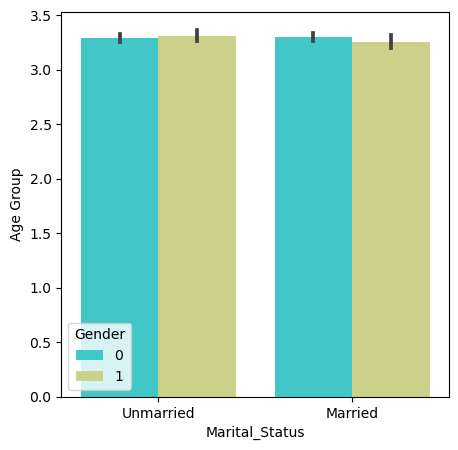

In [27]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "Marital_Status", y = "Age Group", hue = "Gender", data = diwalidf, palette = "rainbow")

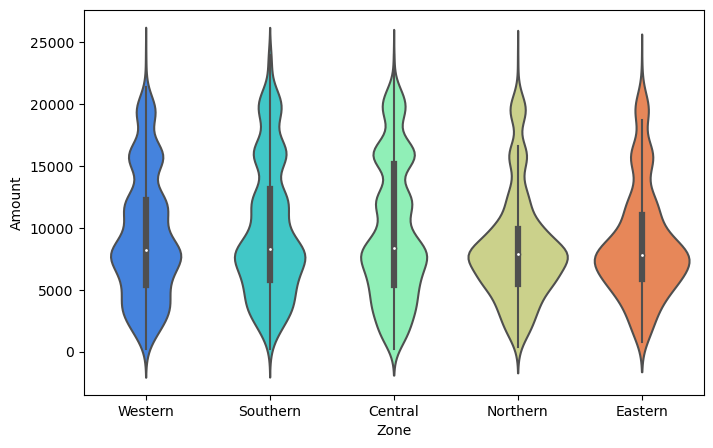

In [28]:
plt.figure(figsize = (8, 5))
sns.violinplot(y = "Amount", x = "Zone", data = diwalidf, palette = "rainbow")
plt.show()

<Axes: xlabel='Zone', ylabel='Amount'>

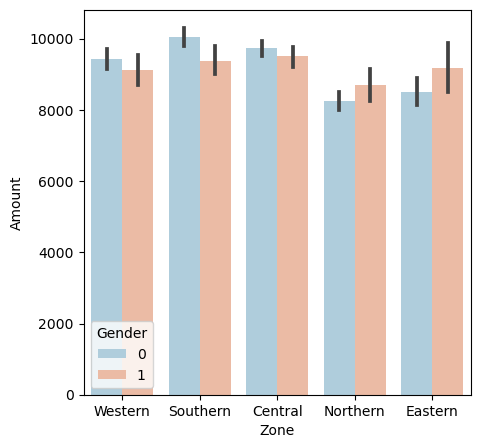

In [29]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "Zone", y = "Amount", hue = "Gender", data = diwalidf, palette = "RdBu_r")

C:\Users\Z5070\AppData\Local\Temp\ipykernel_672\3644412904.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diwalidf["Amount"], kde = True)


<Axes: xlabel='Amount', ylabel='Density'>

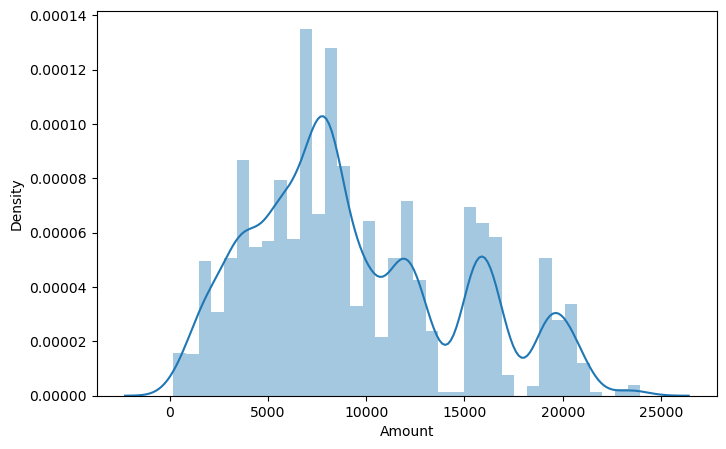

In [30]:
plt.figure(figsize = (8, 5))
sns.distplot(diwalidf["Amount"], kde = True)

<Axes: >

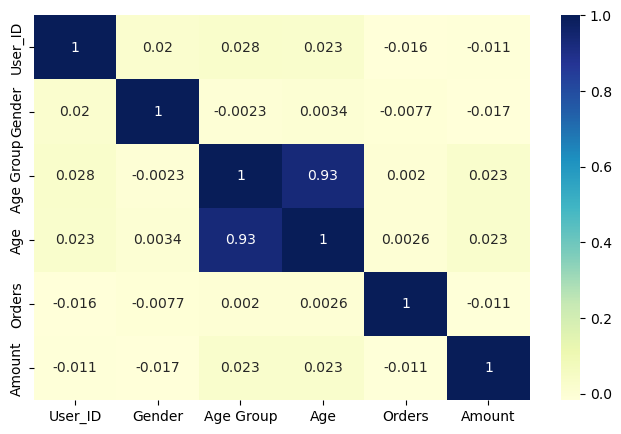

In [31]:
corr_matrix = diwalidf.corr(numeric_only = True)
plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, annot = True, cmap =  "YlGnBu")

<Axes: xlabel='Zone', ylabel='Orders'>

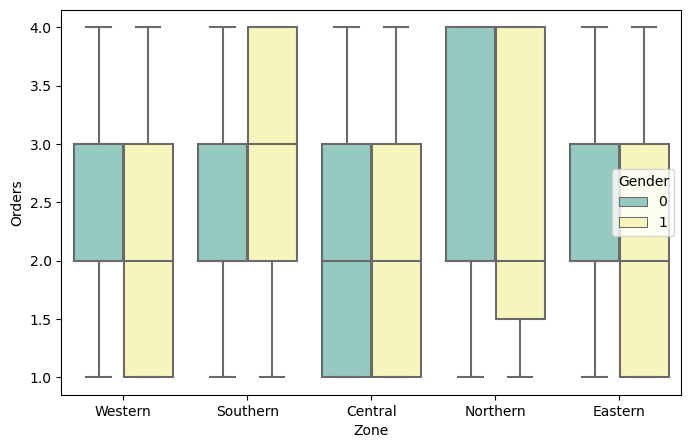

In [32]:
plt.figure(figsize =  (8, 5))
sns.boxplot(x = "Zone", y = "Orders", hue = "Gender", data = diwalidf, palette = "Set3")